#Importing Libraries


####Basic

In [1]:
import numpy as np
import pandas as pd

####Visualization

In [2]:
## Seaborn is a library for making statistical graphics in Python.
import seaborn as sns
import matplotlib.pyplot as plt

####Data-Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

##Importing Various Models

In [4]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor

####Evaluation

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Importing Dataset from local drive

In [6]:
#! gdown 19WiV04PNWUmhgSJSi6KA4O4RBpfiBi46

In [6]:
df = pd.read_csv("steel_strength.csv")
df.head()

,formula,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [7]:
df.shape

(312, 18)

In [8]:
# Droping Formula column
df = df.drop(['formula'],axis=1)

In [9]:
df.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [11]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [12]:
df = df.fillna(df.mean())

In [13]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        312 non-null    float64
dt

#Correlation among parameters

<Axes: >

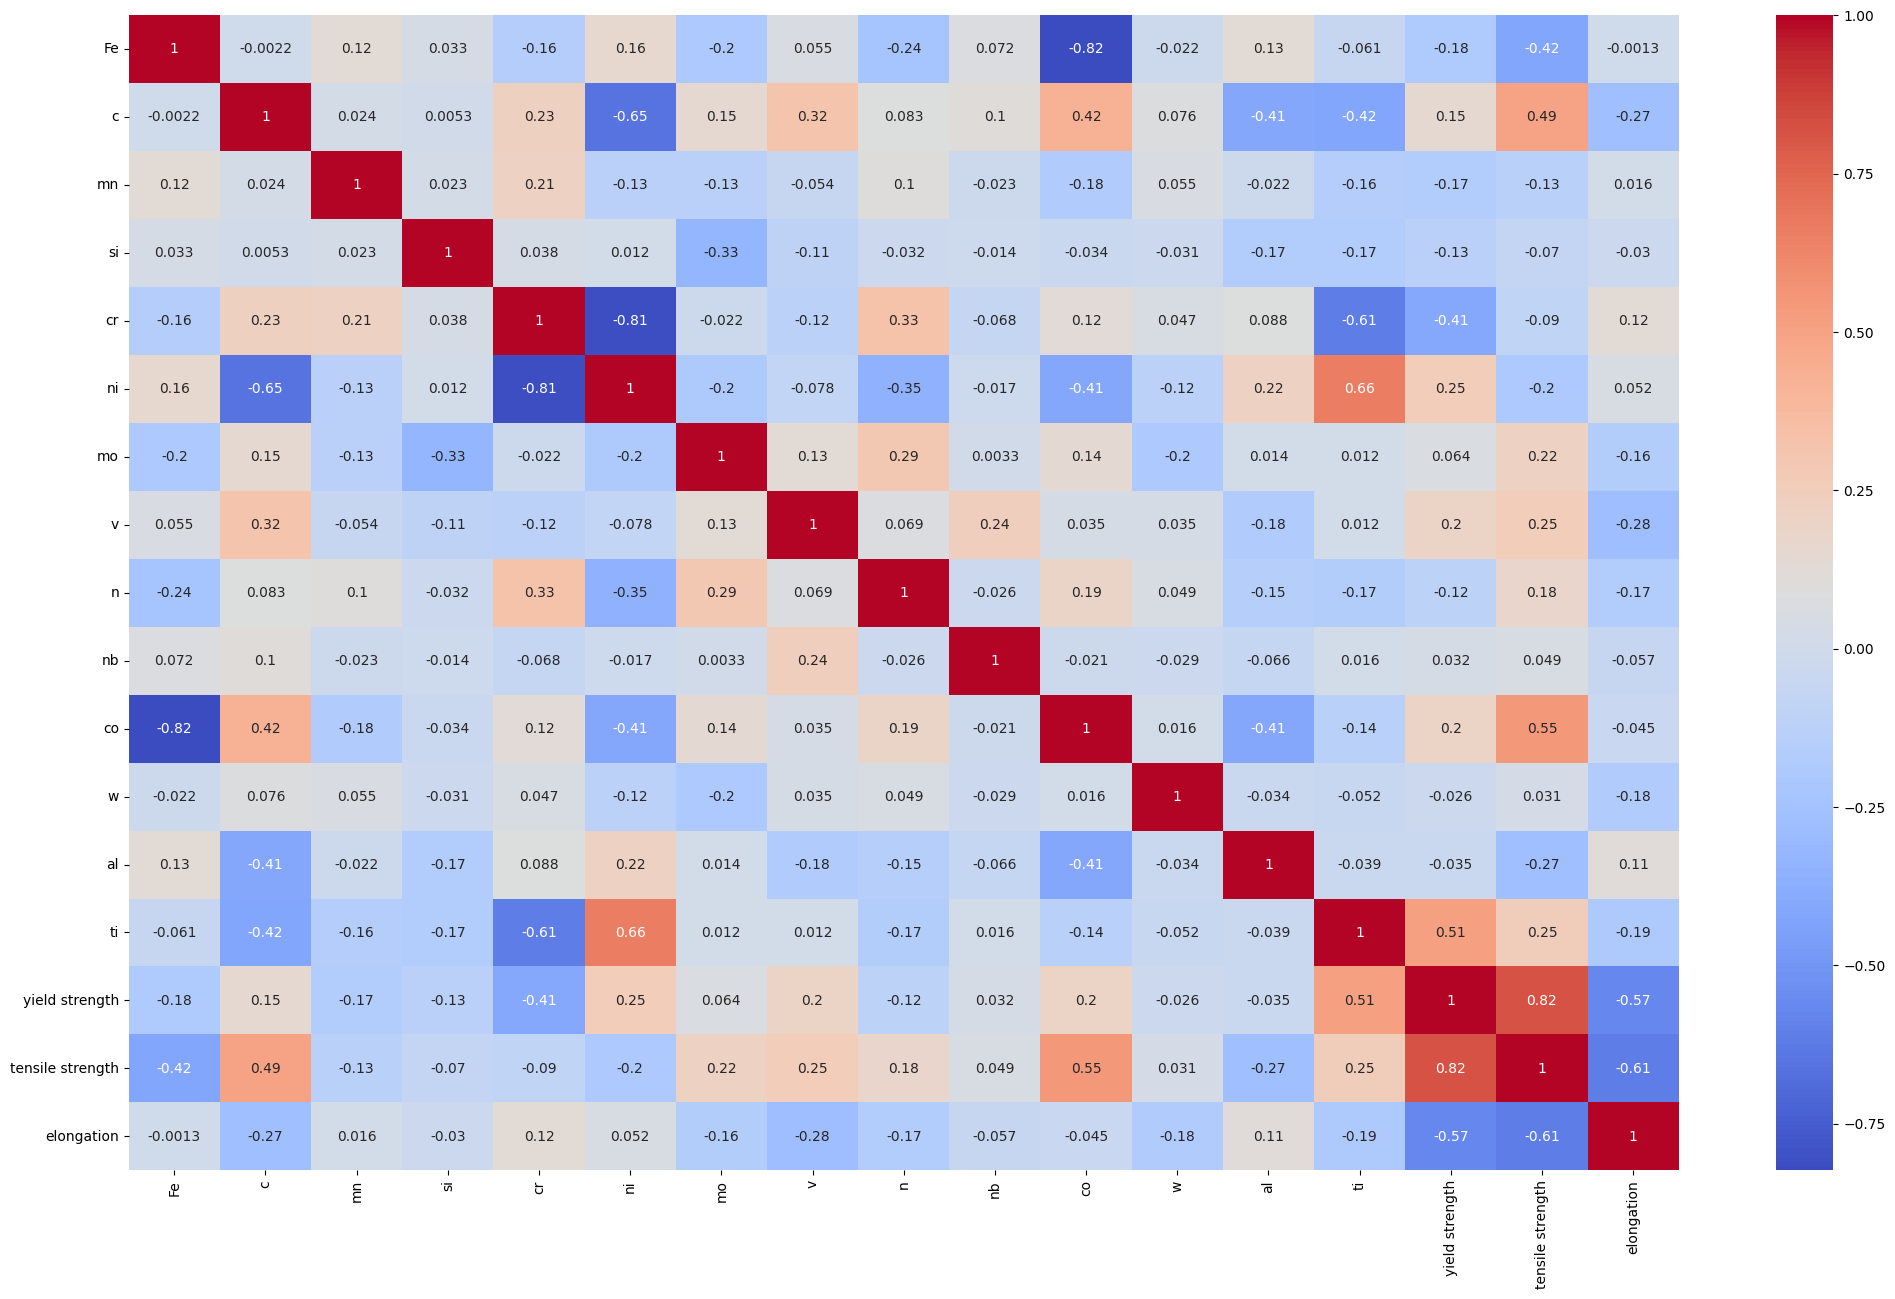

In [15]:
correlation = df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')

#Standardizing the Data

In [16]:
X = df.iloc[:,0:14] #Feature Columns
y = df.iloc[:,14:]  #Target Columns

In [17]:
X.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [18]:
y.head()

,yield strength,tensile strength,elongation
0,2411.5,2473.5,7.000000
1,1123.1,1929.2,8.000000
2,1736.3,1871.8,14.007261
3,2487.3,2514.9,9.000000
4,2249.6,2315.0,8.500000


Scaling of data

In [19]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
y_scaled = pd.DataFrame(sc.fit_transform(y),columns=y.columns);

In [20]:
X_scaled.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.000000,0.046512,0.013378,0.008439,0.000000,0.938066,0.303627,0.002315,0.000000,0.004,0.746142,0.000000,0.078212,0.620
1,0.018634,0.418605,0.000000,0.000000,0.767867,0.000000,0.309845,0.106481,0.266667,0.004,0.968143,0.255991,0.016760,0.000
2,0.064441,0.000000,0.000000,0.000000,0.495140,0.640305,0.082902,0.002315,0.000000,0.004,0.691389,0.000000,0.212291,0.228
3,0.043090,0.023256,0.013378,0.008439,0.000000,0.842782,0.407254,0.002315,0.000000,0.004,0.746142,0.000000,0.067039,0.588
4,0.074922,0.023256,0.013378,0.008439,0.000000,0.923773,0.148187,0.002315,0.000000,0.004,0.741165,0.000000,0.067039,0.620


In [21]:
y_scaled.head()

,yield strength,tensile strength,elongation
0,0.934326,0.937782,0.151515
1,0.077905,0.586847,0.181818
2,0.485509,0.549839,0.363856
3,0.984712,0.964475,0.212121
4,0.826708,0.835590,0.196970


Splitting of data

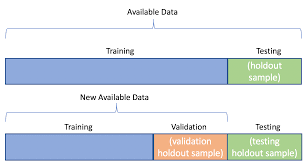

In [22]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(224, 14), (224, 3)], [(56, 14), (56, 3)], [(32, 14), (32, 3)])

In [23]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (224, 14) (224, 3)
Validation set shape: (56, 14) (56, 3)
Test set shape: (32, 14) (32, 3)


In [24]:
y_Test = sc.inverse_transform(y_test)
actual_yield_strength = np.transpose(y_Test)[0]
actual_tensile_strength = np.transpose(y_Test)[1]
actual_pct_elongation = np.transpose(y_Test)[2]

In [25]:
actual_yield_strength

array([1680.6, 1150.6, 1860.3, 1297.5, 1287.3, 1012.8, 1139.7, 1340.8,
       1404.2, 1088.6, 1172. , 1792.2, 1768. , 1131.9, 1429.7, 1376.7,
       1026.6, 1819. , 1846.5, 1592.9, 1071.4, 1010.8, 1603.3, 1615.8,
       2331.1, 1414.5, 1308. , 1371.1, 1486.2, 1455.4, 1280.2, 1309.1])

#Modelling

###Regression using Sklearn models

In order to find out the baseline models for the data, a spot checking method is being used

In [26]:
! pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           #('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           #('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           #('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           #('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           #('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      MSE = mean_squared_error(yValid, model_results)
      RMSE=np.sqrt(MSE)
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults

In [55]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

,Model Name,R2 Score,RMSE,MAE
0,Random Forest,0.769904,0.087720,0.059861
1,Support Vector,0.747576,0.092044,0.066530
2,Decision Tree,0.699167,0.106256,0.071512
3,KNN,0.691688,0.106273,0.071565
4,Linear,0.577573,0.123221,0.084051
5,RidgeCV,0.539772,0.129784,0.087283


In [57]:
import xgboost as xgb

def model_test_results(XTrain,XTest,yTrain,yTest):
  test_models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           #('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           #('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           #('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           #('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           #('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in test_models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XTest)
      r2score = r2_score(yTest, model_results)
      MSE = mean_squared_error(yTest, model_results)
      RMSE=np.sqrt(MSE)
      MAE = mean_absolute_error(yTest, model_results)
      finalResults.append((name, r2score, RMSE, MAE))
  finalResults.sort(key=lambda k:k[2])
  return finalResults

In [58]:
np.random.seed(42)
np__test_results = model_test_results(X_train,X_test,y_train,y_test)
test_results = pd.DataFrame(np__test_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
test_results

,Model Name,R2 Score,RMSE,MAE
0,KNN,0.620112,0.123647,0.088074
1,Support Vector,0.606301,0.125136,0.087908
2,Random Forest,0.603458,0.125250,0.084284
3,Decision Tree,0.462184,0.145381,0.098271
4,Linear,0.375340,0.158899,0.112670
5,RidgeCV,0.368985,0.159789,0.115806


In [59]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

Text(0.5, 1.0, 'r2score comparison')

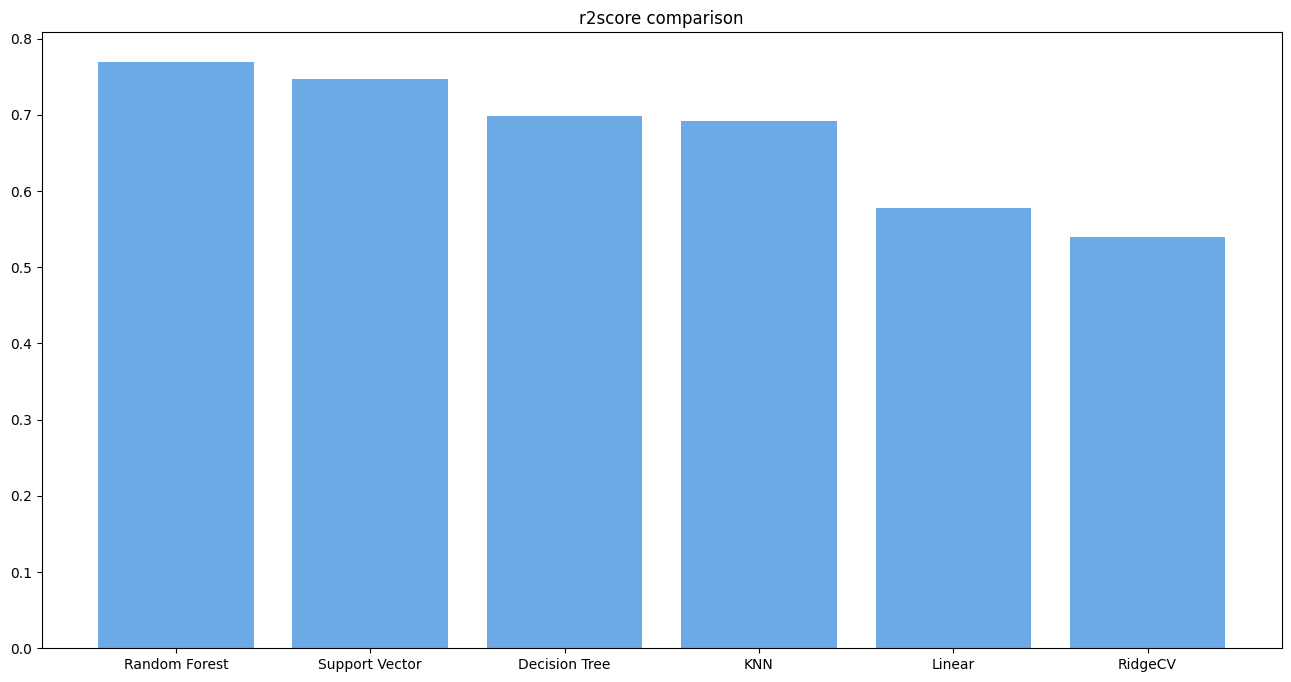

In [60]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

Text(0.5, 1.0, 'rmse comparison')

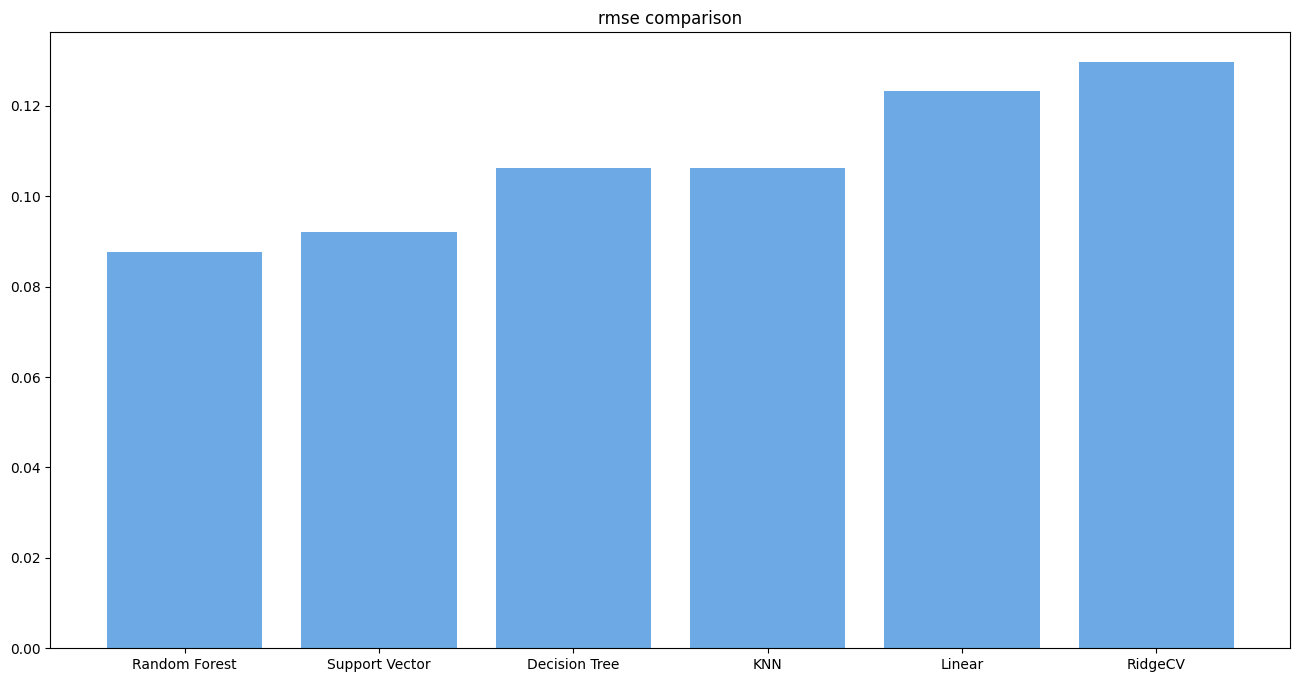

In [61]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

Text(0.5, 1.0, 'mae comparison')

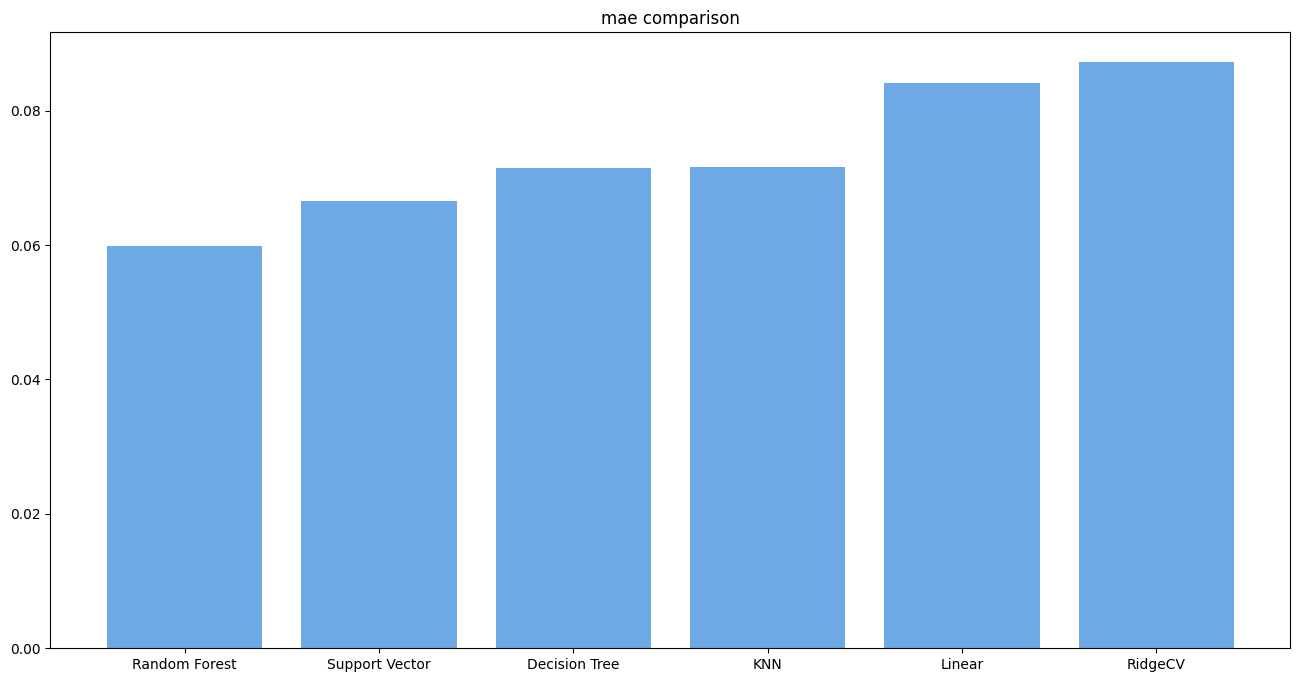

In [62]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [63]:
Final_models = results.iloc[:1,:]

In [64]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,Random Forest,0.769904,0.08772,0.059861




---



---



###Regression using Neural Network

In [65]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [66]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

c:\Users\ABHISHEK PRAKASH\anaconda3\envs\starai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0915 - mse: 0.0915
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0341 - mse: 0.0341
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0332 - mse: 0.0332
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0363 - mse: 0.0363
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0282 - mse: 0.0282
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mse: 0.0215
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197 - mse: 0.0197
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0224 - mse: 0.0224
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0224 - mse: 0.0224
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0212 - mse: 0.0212
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0180 - mse: 0.0180
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0187 - mse: 0.0187
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/ste

In [68]:
y_pred = model.predict(X_valid)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [69]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

In [70]:
NN_res = {
    'Model Name': 'Neural Network',
    'R2 Score': r2_score(y_valid, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred)),
    'MAE': mean_absolute_error(y_valid, y_pred)
}


In [45]:
Final_models = pd.concat([Final_models, pd.DataFrame([NN_res])], ignore_index=True)

In [46]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,Random Forest,0.769904,0.087720,0.059861
1,Neural Network,0.779079,0.082303,0.056684




---



---



In [47]:
NN_test_y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [48]:
NN_Final_results = {
    'r2score': r2_score(y_test, NN_test_y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, NN_test_y_pred)),  # manually take sqrt
    'mae': mean_absolute_error(y_test, NN_test_y_pred)
}

In [49]:
NN_Final_results

{'r2score': 0.6929022669792175,
 'rmse': np.float64(0.10906378286886047),
 'mae': 0.07455622404813766}

In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Model performance data
Final_models = pd.DataFrame({
    'Model Name': ['Random Forest', 'Neural Network'],
    'R2 Score': [0.769904, 0.779079],
    'RMSE': [0.087720, 0.082303],
    'MAE': [0.059861, 0.056684]
})

# Normalize RMSE and MAE (lower is better → invert scale)
scaler = MinMaxScaler()
Final_models[['R2 Score']] = scaler.fit_transform(Final_models[['R2 Score']])
Final_models[['RMSE', 'MAE']] = 1 - scaler.fit_transform(Final_models[['RMSE', 'MAE']])

# Calculate composite score (you can change weights as needed)
Final_models['Composite Score'] = (
    0.5 * Final_models['R2 Score'] + 
    0.25 * Final_models['RMSE'] + 
    0.25 * Final_models['MAE']
)

# Get best model based on composite score
best_model_idx = Final_models['Composite Score'].idxmax()
best_model_name = Final_models.loc[best_model_idx, 'Model Name']

print("Best model based on combined metrics is:", best_model_name)

Best model based on combined metrics is: Neural Network


In [78]:
Final_pred = sc.inverse_transform(NN_test_y_pred)

# Extract individual targets
GB_predicted_yield_strength = np.transpose(Final_pred)[0]
GB_predicted_tensile_strength = np.transpose(Final_pred)[1]
GB_predicted_pct_elongation = np.transpose(Final_pred)[2]

###Graphical Visualization

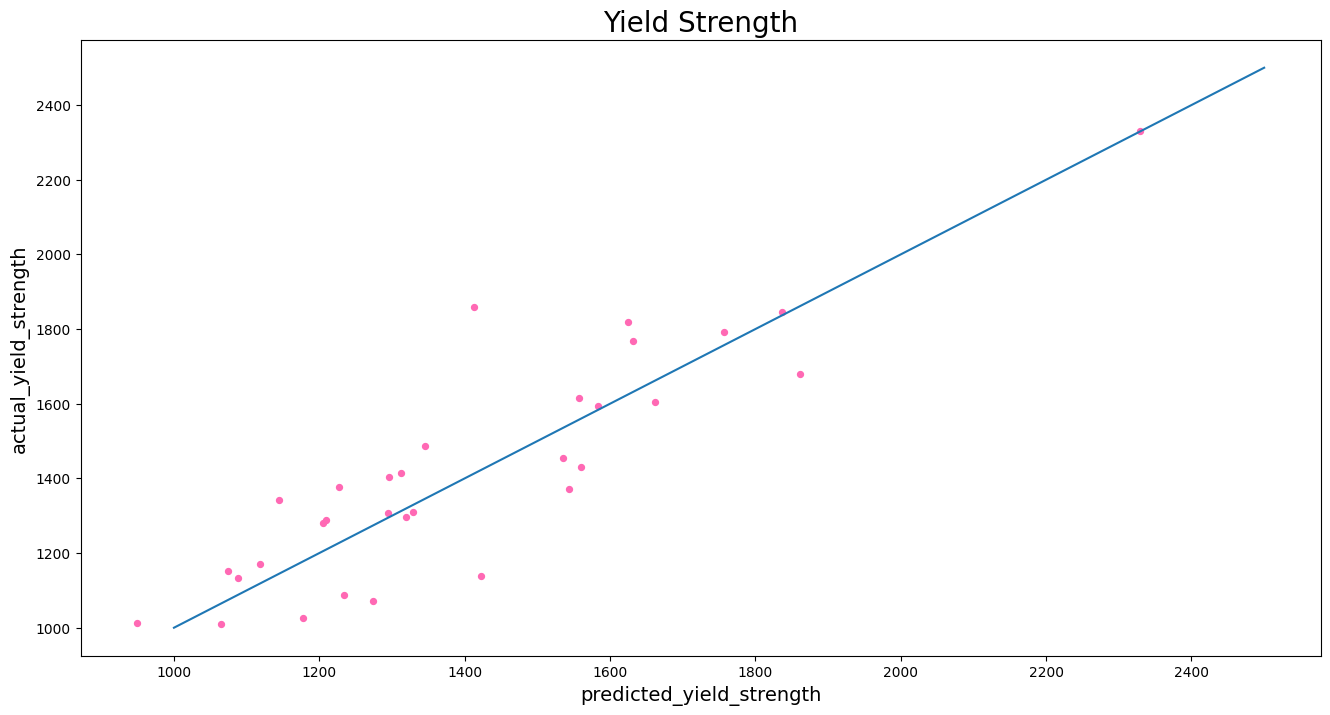

In [79]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_predicted_yield_strength, actual_yield_strength, color = 'hotpink', s=18)
x3 = np.linspace(1000, 2500, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Yield Strength', fontsize = 20)
ax0.set_xlabel('predicted_yield_strength', fontsize = 14)
ax0.set_ylabel('actual_yield_strength', fontsize = 14)
plt.show()

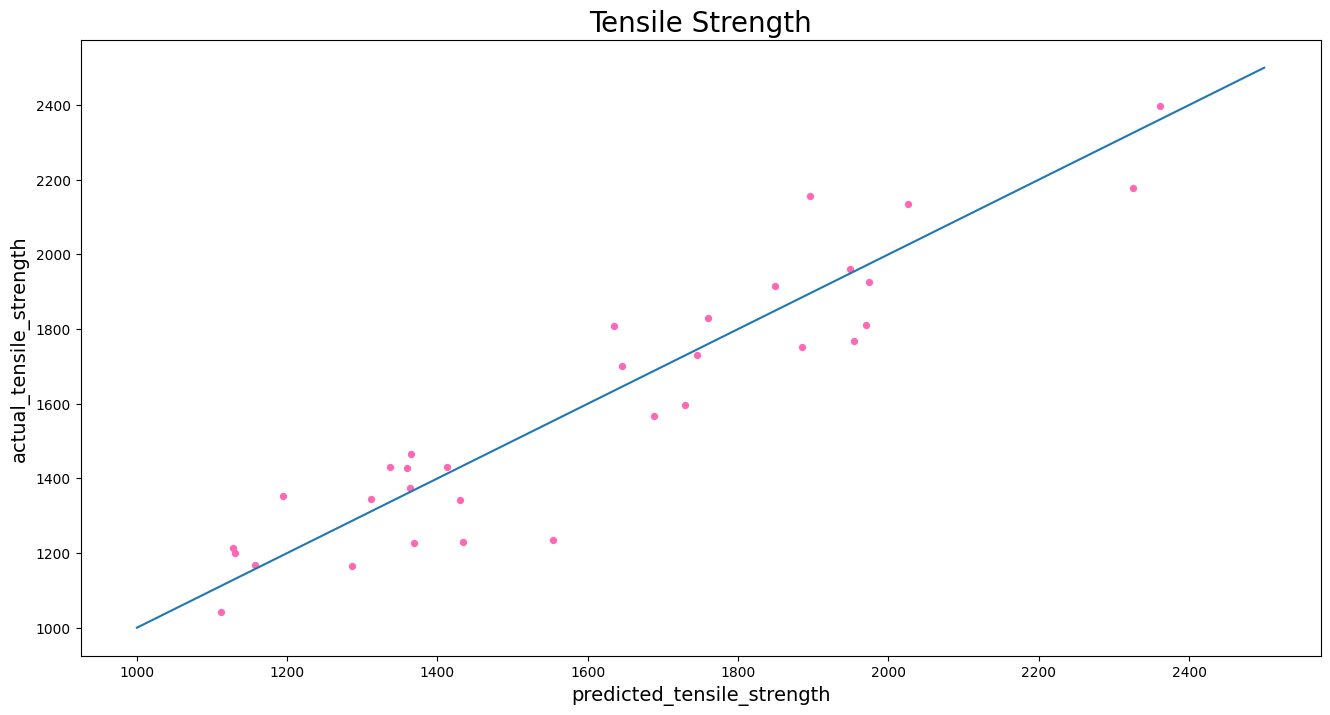

In [80]:
fig ,(ax1) = plt.subplots(figsize=(16,8))
ax1.scatter(GB_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(1000, 2500, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

Text(0, 0.5, 'actual_pct_elongation')

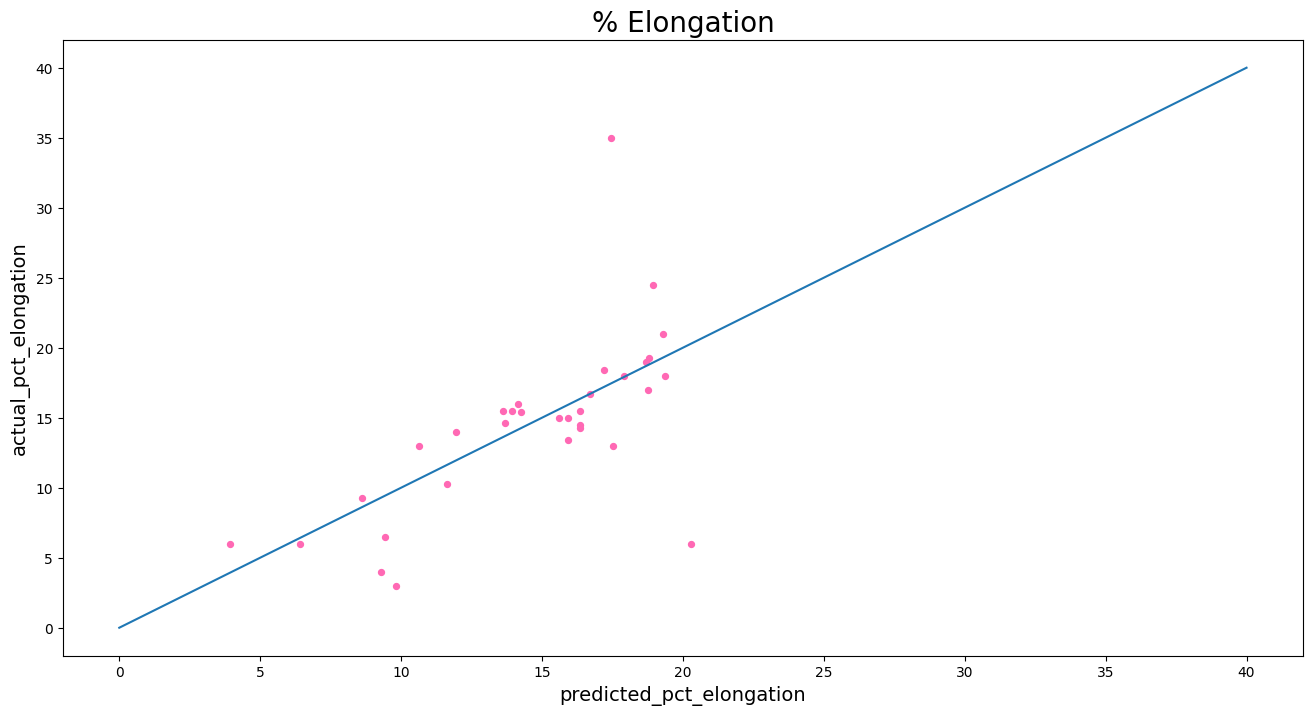

In [81]:
fig ,(ax2) = plt.subplots(figsize=(16,8))
ax2.scatter(GB_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 40, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)



---



---



---



---

